In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SONY.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# In ra 5 dòng đầu tiên của DataFrame
df


,Price,Open,High,Low,Vol.,Change %
0,45.79,45.44,45.81,45.24,844.22K,1.87%
1,46.30,45.93,46.36,45.90,613.23K,1.11%
2,47.25,46.81,47.26,46.80,770.67K,2.05%
3,48.70,48.18,48.79,48.17,1.36M,3.07%
4,49.00,48.80,49.01,48.73,618.86K,0.62%
...,...,...,...,...,...,...
1490,85.32,85.27,85.53,84.62,1.03M,-0.95%
1491,86.40,85.88,86.69,85.86,811.89K,1.27%
1492,88.40,89.00,89.54,88.40,2.17M,2.31%
1493,88.51,87.98,88.62,87.37,850.75K,0.12%


In [2]:
# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 0.001}
Best score: 0.9338323354869228


In [4]:

y_pred = svr_rbf.predict(x_test)
y_pred


array([65.50260552, 67.46117844, 67.05170079, 67.39127619, 66.93183093,
       65.41260672, 64.27213004, 62.8201602 , 64.69241254, 65.18258415,
       65.34260375, 64.95252462, 64.57234467, 64.94252119, 64.07195096,
       64.36220121, 66.35231687, 67.18154823, 66.96179935, 66.87189217,
       66.67207797, 73.36787748, 72.55310644, 71.30973457, 74.46965615,
       74.46965615, 77.77748823, 75.56022653, 79.47769437, 82.07661584,
       82.15570467, 82.95673466, 80.55469815, 79.79389191, 80.00138757,
       78.6475341 , 80.24840141, 81.11791769, 82.65999751, 83.04577121,
       81.68122576, 81.97776019, 83.06555813, 81.97776019, 81.49344276,
       79.80377279, 78.321318  , 78.321318  , 79.85317694, 79.11205933,
       81.93821952, 81.54285785, 79.56662704, 77.83682429, 77.54011953,
       77.23345695, 76.64959962, 76.00601688, 76.16447324, 75.2530099 ,
       75.21336196, 75.77819312, 75.28274479, 76.62980273, 77.33238821,
       77.05536108, 80.54481753, 82.22491067, 81.05862831, 83.37

In [5]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[89.3]])

In [6]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([88.13993114]),
 array([86.98390719]),
 array([85.83453929]),
 array([84.69410178]),
 array([83.56442011]),
 array([82.44680729]),
 array([81.34204817]),
 array([80.25042511]),
 array([79.17177446]),
 array([78.10556253]),
 array([77.05097023]),
 array([76.00697782]),
 array([74.97244342]),
 array([73.94617129]),
 array([72.92696743]),
 array([71.91368166]),
 array([70.90523598]),
 array([69.90063972]),
 array([68.89899243]),
 array([67.8994761]),
 array([66.9013385]),
 array([65.90387022]),
 array([64.90637843]),
 array([63.90816124]),
 array([62.9084866]),
 array([61.90658081]),
 array([60.90163187]),
 array([59.89281341]),
 array([58.87933597]),
 array([57.86053249])]

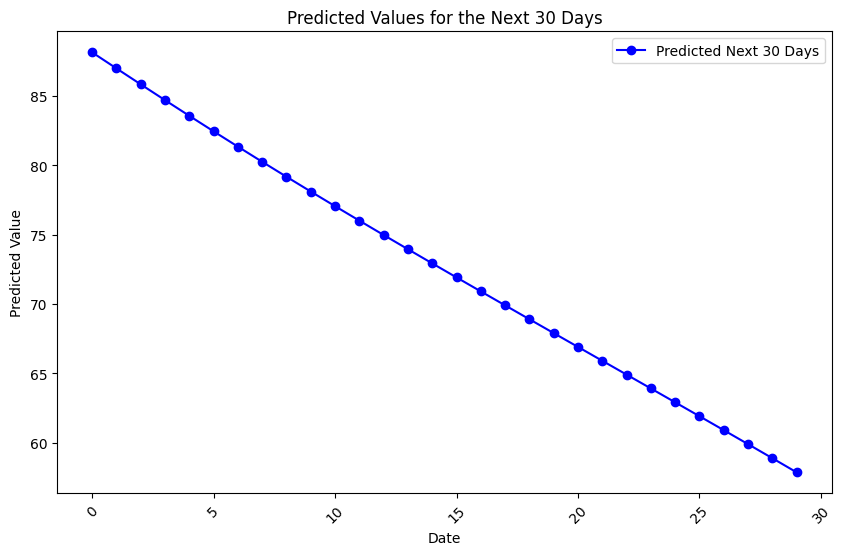

In [7]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [8]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.7874241434261171
Testing MAPE: 0.00769481931387693
Testing MAE: 0.6546205305404849


In [10]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.7874241434261171
Testing MAPE: 0.00769481931387693
Testing MAE: 0.6546205305404849


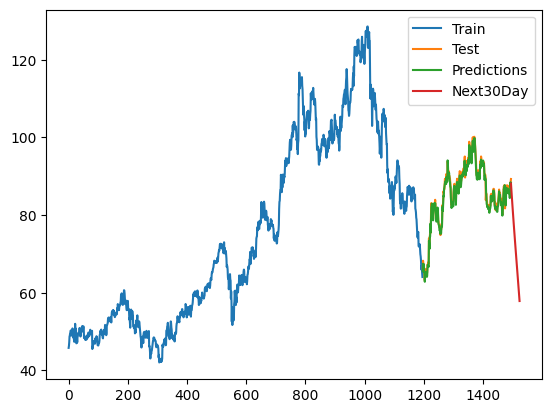

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()